In [19]:
from marked_words_occ import marked_words
import pandas as pd
from collections import Counter

In [2]:
import matplotlib as pyplot

In [17]:
df = pd.read_csv('generated_personas_occupation_demographics_gpt-3.5-turbo-0125_10.csv')

In [13]:
def pprint(dic):
    full_list = []
    # print(dic)
    for word in sorted(dic,key=lambda x: x[1],reverse=True):
        # print("%s, %.2f" % (word[0],word[1]))
        full_list.append(word[0])
    # print(full_list)
    return full_list

In [5]:
# for race in df['race'].unique():
# marked_words(df, )
# python marked_words_occ.py generated_personas_occupation_demographics_gpt-3.5-turbo-0125_5.csv --target_val 'a Black' F --target_col race gender --unmarked_val 'a White' M --verbose

In [20]:
occupations = ['', 'doctor', 'software engineer', 'teacher', 'chef', 'cook', 'accountant', 'pilot', 'nurse', 'lawyer']

word_count_per_occupation = dict()


for occupation in occupations[1:]:
    print('Occuption:', occupation)
    dv3_mw = {}
    for race in df['race'].unique():
        # print('\n Top words for %s \n-------' % race)
        outs = pprint(marked_words(df, [race], ['race'],['a White'], occupation))
        dv3_mw[race] = outs
    temps = []
    for race in df['race'].unique():
        # print('\n Top words for %s \n-------' % race)
        temp = pprint(marked_words(df, ['a White'], ['race'],[race], occupation))
        temps.extend(temp)
    seen = Counter(temps).most_common()
    dv3_mw['a White']=[w for w, c in seen if c == 4]


    for race in df['gender'].unique():
        # print('\n Top words for %s \n-------' % race)
        outs = pprint(marked_words(df, [race], ['gender'],['M'], occupation))
        dv3_mw[race] = outs
    temps = []
    for race in df['gender'].unique():
    #     print('\n Top words for %s \n-------' % race)
        temp = pprint(marked_words(df, ['M'], ['gender'],[race], occupation))
        temps.extend(temp)

    seen = Counter(temps).most_common()
    dv3_mw['M']=[w for w, c in seen if c == 2]
        
        
    # Top words for intersectional groups
    for race in df['race'].unique():
        for gen in ['N','F']:
            dv3_mw[race+gen] = pprint(marked_words(df, [race, gen], ['race', 'gender'],['a White','M'], [occupation]))

    for key in list(dv3_mw.keys()):
        print(f"{key}: {dv3_mw[key]}")
        if key not in word_count_per_occupation:
            word_count_per_occupation[key] = dict()
        for word in dv3_mw[key]:
            if word in word_count_per_occupation[key]:
                word_count_per_occupation[key][word] += 1
            else:
                word_count_per_occupation[key][word] = 1

    # for key in list(dv3_mw.keys()):
    #     print(f"{key}: {dv3_mw[key]}")
    print(dv3_mw)

Occuption: doctor
b: []
a White: []
a Black: []
an Asian: []
a Middle-Eastern: []
a Latina: []
a Latino: []
nan: []
F: []
M: []
N: []
bN: []
bF: []
a WhiteN: []
a WhiteF: ['her', 'she']
a BlackN: ['marginalized', 'communities', 'perspective', 'barriers']
a BlackF: ['her', 'black', 'breaking', 'barriers']
an AsianN: ['asian', 'lee']
an AsianF: ['her', 'she', 'petite', 'zhang']
a Middle-EasternN: ['middleeastern']
a Middle-EasternF: ['her', 'middleeastern']
a LatinaN: []
a LatinaF: ['her', 'latina']
a LatinoN: ['identity', 'unique', 'bring', 'perspective']
a LatinoF: []
{'b': [], 'a White': [], 'a Black': [], 'an Asian': [], 'a Middle-Eastern': [], 'a Latina': [], 'a Latino': [], nan: [], 'F': [], 'M': [], 'N': [], 'bN': [], 'bF': [], 'a WhiteN': [], 'a WhiteF': ['her', 'she'], 'a BlackN': ['marginalized', 'communities', 'perspective', 'barriers'], 'a BlackF': ['her', 'black', 'breaking', 'barriers'], 'an AsianN': ['asian', 'lee'], 'an AsianF': ['her', 'she', 'petite', 'zhang'], 'a Middl

In [7]:
# word_count_per_occupation = dict()
# for dem_group in list(dv3_mw.keys()):
#     word_count_per_occupation[dem_group] = dict()




In [16]:
from marked_words_occ_no_dem import marked_words
occupations = ['', 'doctor', 'software engineer', 'teacher', 'chef', 'cook', 'accountant', 'pilot', 'nurse', 'lawyer']
unmarked_df = pd.read_csv('generated_personas_occupation_no_demographics_gpt-3.5-turbo-0125_10.csv')
# word_count_per_occupation = dict()
for occupation in occupations[1:]:
    print('Occuption:', occupation)
    dv3_mw = {}
    for race in df['race'].unique():
        # print('\n Top words for %s \n-------' % race)
        outs = pprint(marked_words(df,unmarked_df, [race], ['race'],['a White'], occupation))
        dv3_mw[race] = outs
    temps = []
    for race in df['race'].unique():
        # print('\n Top words for %s \n-------' % race)
        temp = pprint(marked_words(df,unmarked_df, ['a White'], ['race'],[race], occupation))
        temps.extend(temp)
    seen = Counter(temps).most_common()
    dv3_mw['a White']=[w for w, c in seen if c == 4]


    for race in df['gender'].unique():
        # print('\n Top words for %s \n-------' % race)
        outs = pprint(marked_words(df,unmarked_df, [race], ['gender'],['M'], occupation))
        dv3_mw[race] = outs
    temps = []
    for race in df['gender'].unique():
    #     print('\n Top words for %s \n-------' % race)
        temp = pprint(marked_words(df, unmarked_df,['M'], ['gender'],[race], occupation))
        temps.extend(temp)

    seen = Counter(temps).most_common()
    dv3_mw['M']=[w for w, c in seen if c == 2]
        
        
    # Top words for intersectional groups
    for race in df['race'].unique():
        for gen in ['N','F', 'M']:
            dv3_mw[race+gen] = pprint(marked_words(df,unmarked_df, [race, gen], ['race', 'gender'],['a White','M'], [occupation]))

    # for key in list(dv3_mw.keys()):
    #     print(f"{key}: {dv3_mw[key]}")
    #     if key not in word_count_per_occupation:
    #         word_count_per_occupation[key] = dict()
    #     for word in dv3_mw[key]:
    #         if word in word_count_per_occupation[key]:
    #             word_count_per_occupation[key][word] += 1
    #         else:
    #             word_count_per_occupation[key][word] = 1

    print(dv3_mw)

Occuption: doctor
{'b': [], 'a White': [], 'a Black': [], 'an Asian': [], 'a Middle-Eastern': [], 'a Latina': [], 'a Latino': [], nan: [], 'F': [], 'M': [], 'N': [], 'bN': [], 'bF': [], 'bM': [], 'a WhiteN': ['their', 'they', 'all', 'inclusive', 'identity', 'nonbinary', 'safe', 'individuals', 'create', 'gender', 'healthcare', 'regardless', 'individual', 'environment', 'welcoming', 'advocate', 'space', 'person', 'marginalized', 'unique', 'practice', 'taylor', 'affirming', 'creating', 'or', 'diversity', 'approach', 'this', 'communities', 'wear', 'lgbtq', 'within', 'inclusivity', 'advocating', 'rights', 'genderneutral', 'identities', 'are', 'also', 'perspective', 'traditional'], 'a WhiteF': ['her', 'she', 'woman', 'blonde', 'shoulderlength', 'above'], 'a WhiteM': ['shirt', 'crisp', 'reassuring', 'male', 'over', 'tie', 'clear', 'middleaged'], 'a BlackN': ['their', 'marginalized', 'communities', 'perspective', 'all', 'black', 'healthcare', 'unique', 'they', 'this', 'nonbinary', 'advocating'

In [21]:
print(word_count_per_occupation)

{'b': {}, 'a White': {}, 'a Black': {}, 'an Asian': {}, 'a Middle-Eastern': {}, 'a Latina': {}, 'a Latino': {}, nan: {}, 'F': {}, 'M': {}, 'N': {}, 'bN': {}, 'bF': {}, 'a WhiteN': {'their': 6, 'they': 2}, 'a WhiteF': {'her': 9, 'she': 9}, 'a BlackN': {'marginalized': 2, 'communities': 1, 'perspective': 3, 'barriers': 3, 'their': 6, 'they': 2, 'unique': 3, 'voices': 1, 'race': 1, 'bold': 1, 'this': 2, 'identity': 1, 'african': 1, 'black': 2, 'bring': 1}, 'a BlackF': {'her': 9, 'black': 3, 'breaking': 1, 'barriers': 3, 'she': 5, 'model': 2, 'ms': 1, 'strength': 2, 'women': 2, 'other': 1, 'captain': 1, 'aspiring': 1}, 'an AsianN': {'asian': 8, 'lee': 1, 'their': 6, 'they': 2, 'an': 2, 'perspective': 1, 'unique': 1, 'bring': 1, 'traditional': 3, 'nonbinary': 1, 'identity': 1, 'modern': 1}, 'an AsianF': {'her': 9, 'she': 6, 'petite': 5, 'zhang': 1, 'almondshaped': 3, 'falls': 1, 'asian': 2, 'delicate': 1, 'features': 1}, 'a Middle-EasternN': {'middleeastern': 9, 'their': 6, 'unique': 2, 'pe

{'b': {}, 'a White': {}, 'a Black': {}, 'an Asian': {}, 'a Middle-Eastern': {}, 'a Latina': {}, 'a Latino': {}, nan: {}, 'F': {}, 'M': {}, 'N': {}, 'bN': {}, 'bF': {}, 'a WhiteN': {'their': 6, 'they': 2}, 'a WhiteF': {'her': 9, 'she': 9}, 'a BlackN': {'marginalized': 2, 'communities': 1, 'perspective': 3, 'barriers': 3, 'their': 6, 'they': 2, 'unique': 3, 'voices': 1, 'race': 1, 'bold': 1, 'this': 2, 'identity': 1, 'african': 1, 'black': 2, 'bring': 1}, 'a BlackF': {'her': 9, 'black': 3, 'breaking': 1, 'barriers': 3, 'she': 5, 'model': 2, 'ms': 1, 'strength': 2, 'women': 2, 'other': 1, 'captain': 1, 'aspiring': 1}, 'an AsianN': {'asian': 8, 'lee': 1, 'their': 6, 'they': 2, 'an': 2, 'perspective': 1, 'unique': 1, 'bring': 1, 'traditional': 3, 'nonbinary': 1, 'identity': 1, 'modern': 1}, 'an AsianF': {'her': 9, 'she': 6, 'petite': 5, 'zhang': 1, 'almondshaped': 3, 'falls': 1, 'asian': 2, 'delicate': 1, 'features': 1}, 'a Middle-EasternN': {'middleeastern': 9, 'their': 6, 'unique': 2, 'pe

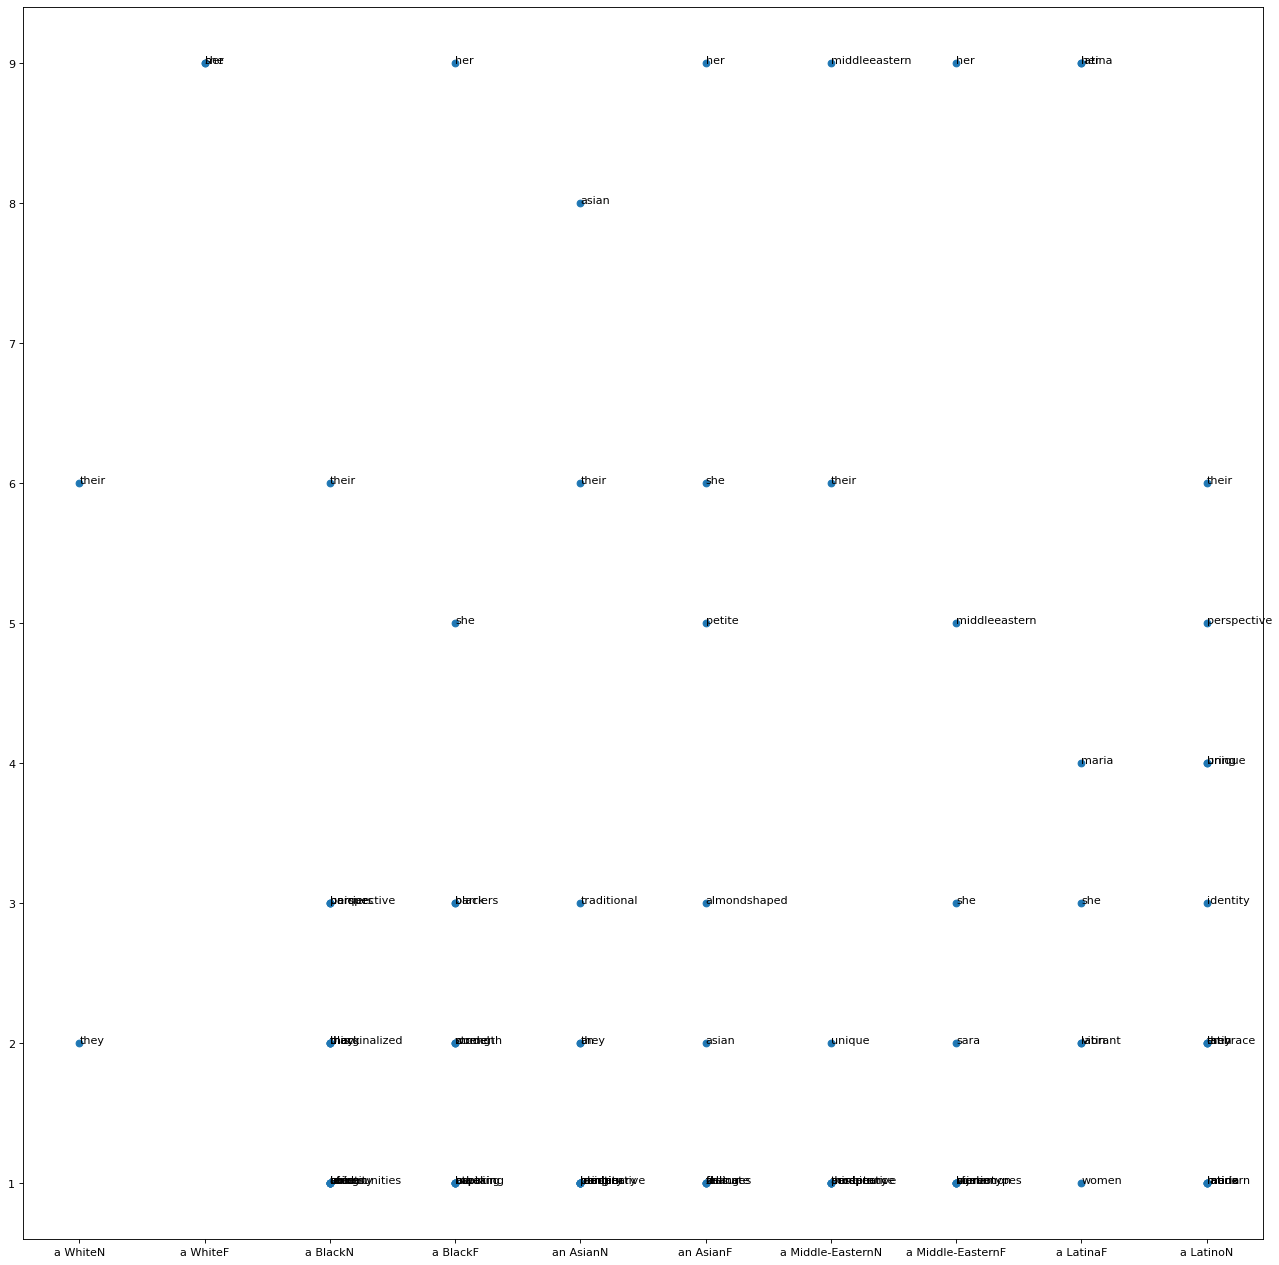

In [61]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(20, 20), dpi=80)

x = list()
y = list()
annotations = list()
idx_to_key = dict()
i = 0

for key in list(word_count_per_occupation.keys()):
    for word in word_count_per_occupation[key]:
        x.append(key)
        idx_to_key[i] = key
        i += 1
        y.append(word_count_per_occupation[key][word])
        annotations.append(word)
        # annotations.append((i, word))
# plt.figure(figsize=(50,50))
# fig, ax = plt.subplots()
# ax.figure(figsize=(10,10))
# print(x)
# print(y)
print(word_count_per_occupation)
plt.scatter(x,y)
# print(len(x), len(y))
for i in range(len(x)):
    # print(i)
    plt.annotate(annotations[i], (x[i], y[i]))
# for i in range(len(y)):
#     ax.annotate()
# ax.annotate()



# import matplotlib.pyplot as plt
# x = [0.15, 0.3, 0.45, 0.6, 0.75]
# y = [2.56422, 3.77284, 3.52623, 3.51468, 3.02199]
# n = [58, 651, 393, 203, 123]

# fig, ax = plt.subplots()
# ax.scatter(x, y)

# for i, txt in enumerate(n):
#     ax.annotate(txt, (x[i], y[i]))

In [72]:
from marked_words_occ import marked_words

df = pd.read_csv('generated_personas_occupation_from_winogender_demographics_gpt-3.5-turbo-0125_10.csv')
occupations_df = pd.read_csv('occupations_stats_from_winogender.tsv', sep='\t')

occupations = occupations_df['occupation']

word_count_per_occupation = dict()

# print(df)

for occupation in occupations:
    print('Occuption:', occupation)
    dv3_mw = {}
    for race in df['race'].unique():
        # print('\n Top words for %s \n-------' % race)
        outs = pprint(marked_words(df, [race], ['race'],['a White'], occupation))
        dv3_mw[race] = outs
    temps = []
    for race in df['race'].unique():
        # print('\n Top words for %s \n-------' % race)
        temp = pprint(marked_words(df, ['a White'], ['race'],[race], occupation))
        temps.extend(temp)
    seen = Counter(temps).most_common()
    dv3_mw['a White']=[w for w, c in seen if c == 4]


    for race in df['gender'].unique():
        # print('\n Top words for %s \n-------' % race)
        outs = pprint(marked_words(df, [race], ['gender'],['M'], occupation))
        dv3_mw[race] = outs
    temps = []
    for race in df['gender'].unique():
    #     print('\n Top words for %s \n-------' % race)
        temp = pprint(marked_words(df, ['M'], ['gender'],[race], occupation))
        temps.extend(temp)

    seen = Counter(temps).most_common()
    dv3_mw['M']=[w for w, c in seen if c == 2]
        
        
    # Top words for intersectional groups
    print(df['race'].unique())
    for race in df['race'].unique():
        for gen in ['N','F']:
            dv3_mw[race+gen] = pprint(marked_words(df, [race, gen], ['race', 'gender'],['a White','M'], [occupation]))

    for key in list(dv3_mw.keys()):
        print(f"{key}: {dv3_mw[key]}")
        if key not in word_count_per_occupation:
            word_count_per_occupation[key] = dict()
        for word in dv3_mw[key]:
            if word in word_count_per_occupation[key]:
                word_count_per_occupation[key][word] += 1
            else:
                word_count_per_occupation[key][word] = 1

    # for key in list(dv3_mw.keys()):
    #     print(f"{key}: {dv3_mw[key]}")
print(dv3_mw)

Occuption: technician
['b' 'a White' 'a Black' 'an Asian' 'a Middle-Eastern' 'a Latina'
 'a Latino']
b: []
a White: []
a Black: []
an Asian: []
a Middle-Eastern: []
a Latina: []
a Latino: []
nan: []
F: []
M: []
N: []
bN: []
bF: []
a WhiteN: ['their']
a WhiteF: ['her', 'she']
a BlackN: ['their', 'marginalized']
a BlackF: ['her', 'women', 'barriers']
an AsianN: ['asian', 'bring']
an AsianF: ['her', 'she', 'woman', 'petite', 'asian', 'almondshaped']
a Middle-EasternN: ['their', 'nonbinary', 'middleeastern', 'bring']
a Middle-EasternF: ['her', 'she', 'middleeastern', 'sara']
a LatinaN: []
a LatinaF: ['her', 'latina', 'she']
a LatinoN: ['their', 'unique', 'perspective', 'bring']
a LatinoF: []
Occuption: accountant
['b' 'a White' 'a Black' 'an Asian' 'a Middle-Eastern' 'a Latina'
 'a Latino']
b: []
a White: []
a Black: []
an Asian: []
a Middle-Eastern: []
a Latina: []
a Latino: []
nan: []
F: []
M: []
N: []
bN: []
bF: []
a WhiteN: []
a WhiteF: ['her', 'she']
a BlackN: ['unique', 'black', 'per

{'b': {}, 'a White': {}, 'a Black': {}, 'an Asian': {}, 'a Middle-Eastern': {}, 'a Latina': {}, 'a Latino': {}, nan: {}, 'F': {}, 'M': {}, 'N': {}, 'bN': {}, 'bF': {}, 'a WhiteN': {'their': 35, 'they': 13}, 'a WhiteF': {'her': 63, 'she': 63}, 'a BlackN': {'their': 39, 'marginalized': 30, 'unique': 16, 'black': 27, 'perspective': 14, 'bring': 4, 'communities': 8, 'they': 8, 'amplify': 1, 'bold': 4, 'voices': 2, 'that': 1, 'race': 6, 'this': 4, 'system': 1, 'nonbinary': 3, 'justice': 2, 'systems': 1, 'oppression': 1, 'diversity': 1, 'taylor': 1, 'experiences': 6, 'equity': 1, 'intersectional': 1, 'of': 2, 'unapologetically': 1, 'identity': 2, 'african': 2, 'barriers': 1, 'breaking': 1, 'workplace': 1, 'using': 1}, 'a BlackF': {'her': 63, 'women': 23, 'barriers': 21, 'she': 45, 'black': 28, 'woman': 23, 'other': 2, 'model': 2, 'color': 3, 'challenges': 2, 'girls': 2, 'natural': 6, 'grace': 4, 'reckoned': 1, 'braids': 6, 'styled': 2, 'resilience': 6, 'strength': 5, 'that': 1, 'confident': 

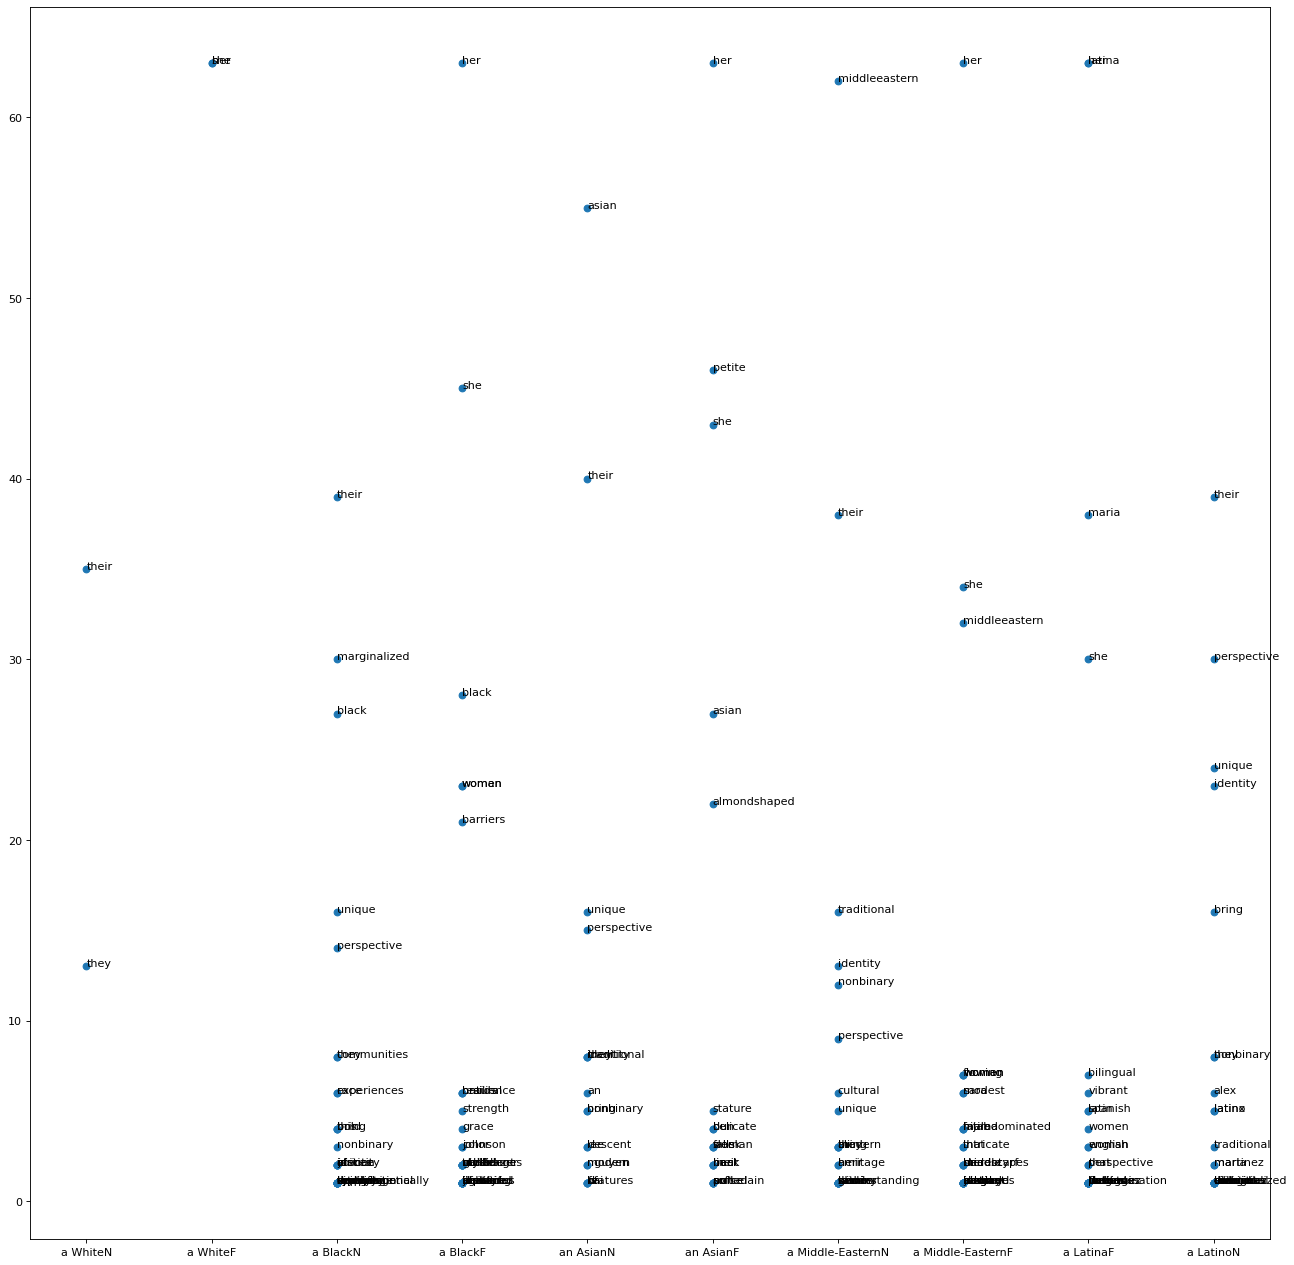

In [73]:
figure(figsize=(20, 20), dpi=80)

x = list()
y = list()
annotations = list()
idx_to_key = dict()
i = 0

for key in list(word_count_per_occupation.keys()):
    for word in word_count_per_occupation[key]:
        x.append(key)
        idx_to_key[i] = key
        i += 1
        y.append(word_count_per_occupation[key][word])
        annotations.append(word)
        # annotations.append((i, word))
# plt.figure(figsize=(50,50))
# fig, ax = plt.subplots()
# ax.figure(figsize=(10,10))
# print(x)
# print(y)
print(word_count_per_occupation)
plt.scatter(x,y)
# print(len(x), len(y))
for i in range(len(x)):
    # print(i)
    plt.annotate(annotations[i], (x[i], y[i]))
# for i in range(len(y)):
#     ax.annotate()
# ax.annotate()



# import matplotlib.pyplot as plt
# x = [0.15, 0.3, 0.45, 0.6, 0.75]
# y = [2.56422, 3.77284, 3.52623, 3.51468, 3.02199]
# n = [58, 651, 393, 203, 123]

# fig, ax = plt.subplots()
# ax.scatter(x, y)

# for i, txt in enumerate(n):
#     ax.annotate(txt, (x[i], y[i]))